In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon May 18 18:06:17 2020

@author: FUJITSU
"""

In [1]:
import time
import argparse
import datetime
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

D:\Instalasi\Anaconda\envs\PythonCPU\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Instalasi\Anaconda\envs\PythonCPU\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Instalasi\Anaconda\envs\PythonCPU\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Instalasi\Anaconda\envs\PythonCPU\lib\site-packages\tensorflow\pyth

In [2]:
# 1. lokasi file
base_dir = 'D:\\Koding\\Python\\Skripsi Daun Jati\\Dataset\\traingenerator\\train'

# 2. augmentasi gambar memperbanyak pola gambar
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range = 20,
                width_shift_range=0.1,
                height_shift_range=0.1,
                validation_split=0.2,
                horizontal_flip = True,
                shear_range = 0.1,
                fill_mode = 'nearest'
    )

train_generator = train_datagen.flow_from_directory(
                    base_dir,
                    target_size = (256, 256),
                    batch_size = 4,
                    subset = 'training',
                    class_mode = 'categorical' #sparse
    )

validation_generator = train_datagen.flow_from_directory(
                        base_dir,
                        target_size = (256, 256),
                        batch_size = 4,
                        subset = 'validation',
                        class_mode = 'categorical' #sparse
    )

Found 960 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [4]:
# 3. arsiterktur model CNN (1)
prob_drop_conv = 0.25 #ukuran menghapus convolutional layer
prob_drop_hidden = 0.3 #ukuran menghapus full coneccted layer
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(256, 256, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(256, (3, 3), padding = 'same', activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(prob_drop_conv),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(prob_drop_conv),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

In [3]:
# 3. arsiterktur model CNN (2)
model_non = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
# 4. melihat model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 256)       2

In [4]:
# 4. melihat model non padding dan drop
model_non.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [6]:
# 5. indeks bias dan pembelajaran model
model.compile(optimizer = tf.keras.optimizers.RMSprop(),
              loss = 'categorical_crossentropy', #sparse_categorical_crossentropy
              metrics = ['accuracy']
              )

In [5]:
# 5. indeks bias dan pembelajaran model non padding dan drop
model_non.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy', #sparse_categorical_crossentropy
              metrics = ['accuracy']
              )

In [7]:
# 6. pembelajaran model(training)
start = datetime.datetime.now()
model.fit(
        train_generator,
        steps_per_epoch = 1000,
        epochs = 100,
        validation_data = validation_generator,
        validation_steps = 50,
        verbose = 2 # 0 (tidak muncul apa-apa), 1 ([=========]), 2 (epoch 1/10)
    )
end = datetime.datetime.now()

Epoch 1/50
25/25 - 39s - loss: 2.3322 - acc: 0.3800 - val_loss: 1.0471 - val_acc: 0.4250
Epoch 2/50
25/25 - 29s - loss: 1.2873 - acc: 0.3700 - val_loss: 1.0838 - val_acc: 0.5500
Epoch 3/50
25/25 - 29s - loss: 1.0184 - acc: 0.4800 - val_loss: 0.6149 - val_acc: 0.7250
Epoch 4/50
25/25 - 31s - loss: 0.9558 - acc: 0.5400 - val_loss: 0.6431 - val_acc: 0.7750
Epoch 5/50
25/25 - 30s - loss: 0.9738 - acc: 0.6900 - val_loss: 0.5268 - val_acc: 0.7750
Epoch 6/50
25/25 - 30s - loss: 0.8580 - acc: 0.6700 - val_loss: 0.5875 - val_acc: 0.8000
Epoch 7/50
25/25 - 30s - loss: 0.7408 - acc: 0.7200 - val_loss: 0.4912 - val_acc: 0.8500
Epoch 8/50
25/25 - 30s - loss: 0.9638 - acc: 0.5700 - val_loss: 0.5990 - val_acc: 0.8750
Epoch 9/50
25/25 - 30s - loss: 0.7572 - acc: 0.6800 - val_loss: 0.7418 - val_acc: 0.6750
Epoch 10/50
25/25 - 32s - loss: 0.9063 - acc: 0.6400 - val_loss: 0.5400 - val_acc: 0.8250
Epoch 11/50
25/25 - 35s - loss: 0.6076 - acc: 0.7700 - val_loss: 0.6271 - val_acc: 0.7000
Epoch 12/50
25/25 -

In [ ]:
# Membuat checkpoint model


In [6]:
# 6. pembelajaran model non padding dan drop(training)
start_non = datetime.datetime.now()
model_non.fit(
        train_generator,
        steps_per_epoch = 1000,
        epochs = 100,
        validation_data = validation_generator,
        validation_steps = 50,
        verbose = 2 # 0 (tidak muncul apa-apa), 1 ([=========]), 2 (epoch 1/10)
    )
end_non = datetime.datetime.now()

Epoch 1/100
1000/1000 - 914s - loss: 0.5819 - acc: 0.7577 - val_loss: 0.3669 - val_acc: 0.8600
Epoch 2/100
1000/1000 - 920s - loss: 0.3718 - acc: 0.8710 - val_loss: 0.2557 - val_acc: 0.8900
Epoch 3/100
1000/1000 - 914s - loss: 0.2346 - acc: 0.9185 - val_loss: 0.3484 - val_acc: 0.8850
Epoch 4/100
1000/1000 - 916s - loss: 0.1805 - acc: 0.9400 - val_loss: 0.4194 - val_acc: 0.7950
Epoch 5/100
1000/1000 - 917s - loss: 0.1721 - acc: 0.9473 - val_loss: 0.3875 - val_acc: 0.8200
Epoch 6/100
1000/1000 - 918s - loss: 0.1472 - acc: 0.9503 - val_loss: 0.2349 - val_acc: 0.9050
Epoch 7/100
1000/1000 - 918s - loss: 0.1269 - acc: 0.9572 - val_loss: 0.2549 - val_acc: 0.9350
Epoch 8/100
1000/1000 - 922s - loss: 0.1051 - acc: 0.9688 - val_loss: 1.1979 - val_acc: 0.8450
Epoch 9/100
1000/1000 - 918s - loss: 0.1200 - acc: 0.9630 - val_loss: 0.1768 - val_acc: 0.9300
Epoch 10/100
1000/1000 - 916s - loss: 0.0872 - acc: 0.9718 - val_loss: 0.2435 - val_acc: 0.9300
Epoch 11/100
1000/1000 - 919s - loss: 0.1054 - ac

In [13]:
# 7. cek akurasi
loss, acc = model.evaluate(validation_generator, verbose=2)
print("tingkat akurasi model: {:5.2f}%".format(100 * acc))
print("tingkat error model: {}".format(loss))
elapsed = end-start
print ('Time: ', elapsed)

60/60 - 47s - loss: 0.9290 - acc: 0.7333
tingkat akurasi model: 73.33%
tingkat error model: 0.9290250216373048
Time:  0:28:11.906577


In [9]:
# 7. cek akurasi non padding dan drop
loss, acc = model_non.evaluate(validation_generator, verbose=2)
print("tingkat akurasi model: {:5.2f}%".format(100 * acc))
print("tingkat error model: {}".format(loss))
elapsed = end_non-start_non
print ('Time: ', elapsed)

60/60 - 47s - loss: 0.5046 - acc: 0.9292
tingkat akurasi model: 92.92%
tingkat error model: 0.5045995445807901
Time:  1 day, 1:45:21.822713


In [15]:
# 8. simpan pembelajaran model
model_non.save('D:\\Koding\\Python\\Skripsi Daun Jati\\Dataset\\traingenerator\\model\\jati_1000.h5')

In [ ]:
# --- prediksi gambar ---

In [3]:
import requests
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
%matplotlib inline

Using TensorFlow backend.


In [4]:
# 9. mendefinisikan parameter objek pengujian
dimensi_gambar = (256,256)
channel = (3,)
input_shape = dimensi_gambar + channel
labels = ['mega', 'ph1', 'plus']
print(labels)

['mega', 'ph1', 'plus']


In [5]:
# 10. gambar dirubuah menjadi pixel
def preprocess(gambar, dimensi_gambar):
    nimg = gambar.convert('RGB').resize(dimensi_gambar, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr
def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [6]:
# 11. menggunakan model yang sudah pernah dibuat pada file lain -opsi-
from tensorflow.keras.models import load_model
MODEL_PATH = 'D:\\Koding\\Python\\skripsi daun jati\\dataset\\traingenerator\\model\\jati_1000.h5'
model = load_model(MODEL_PATH,compile=False)
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
________________________________

[[9.9311090e-01 7.2784635e-15 6.8891454e-03]]
mega 0.9931109


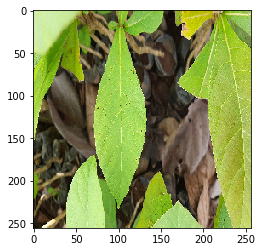

In [26]:
# 12. tahap terakhir deteksi gambar
path = 'D:\\Koding\\Python\\Skripsi Daun Jati\\Dataset\\traingenerator\\tes\\31.jpg'
im = Image.open(path)
img = image.load_img(path, target_size=(256,256))
imgplot = plt.imshow(img)
X = preprocess(im, dimensi_gambar)
X = reshape([X])
y = model.predict(X)
print(y)
print( labels[np.argmax(y)], np.max(y) )